<a href="https://colab.research.google.com/github/lov435/SOEmotions/blob/main/Heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the required classes



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### List of the 28 GoEmotions

In [2]:
emotions = [
    'admiration',
    'amusement',
    'anger',
    'annoyance',
    'approval',
    'caring',
    'confusion',
    'curiosity',
    'desire',
    'disappointment',
    'disapproval',
    'disgust',
    'embarrassment',
    'excitement',
    'fear',
    'gratitude',
    'grief',
    'joy',
    'love',
    'nervousness',
    'optimism',
    'pride',
    'realization',
    'relief',
    'remorse',
    'sadness',
    'surprise',
    'neutral',
]

### Read the emotions prediction spreadsheet

In [3]:
url='https://drive.google.com/file/d/1WyIDTtuaf2wFdDhXdV4QPE-uhgom5Cqq/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

### Group by the seven groups ('Group' column) and merge the emotions for that group into a list so that we can perform a count of each emotions from that list later.

In [4]:
df = df[['Group', 'GoEmotion']]
df = df.groupby(['Group'], as_index = False).agg({'GoEmotion': ','.join});

### Count the occurrence of each emotion in that group

In [5]:
for emotion in emotions:
  df[emotion] = df['GoEmotion'].str.count(emotion)
df = df.drop('GoEmotion', axis=1)

### Set the 'Group' column as index of the dataframe for ease of plotting

In [6]:
df.set_index("Group", inplace = True)

### Set the plot size and print the heatmap.

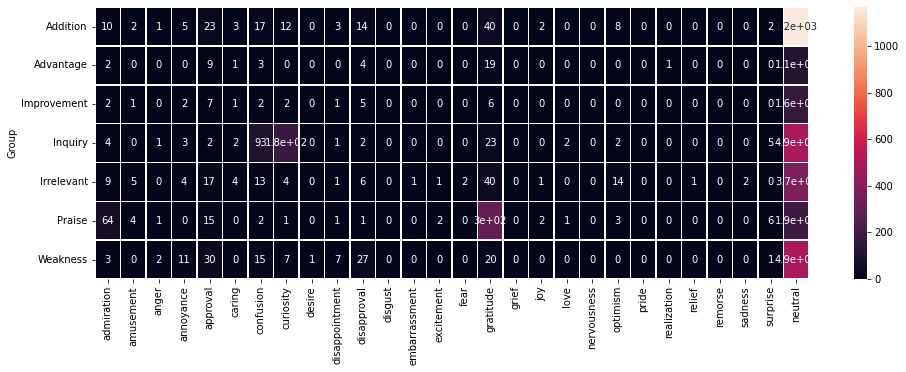

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(df, annot=True, linewidths=.5)

### Drop the 'Neutral' column for reprinting the heatmap

In [8]:
df = df.drop('neutral', axis=1)


### Reprint the heatmap

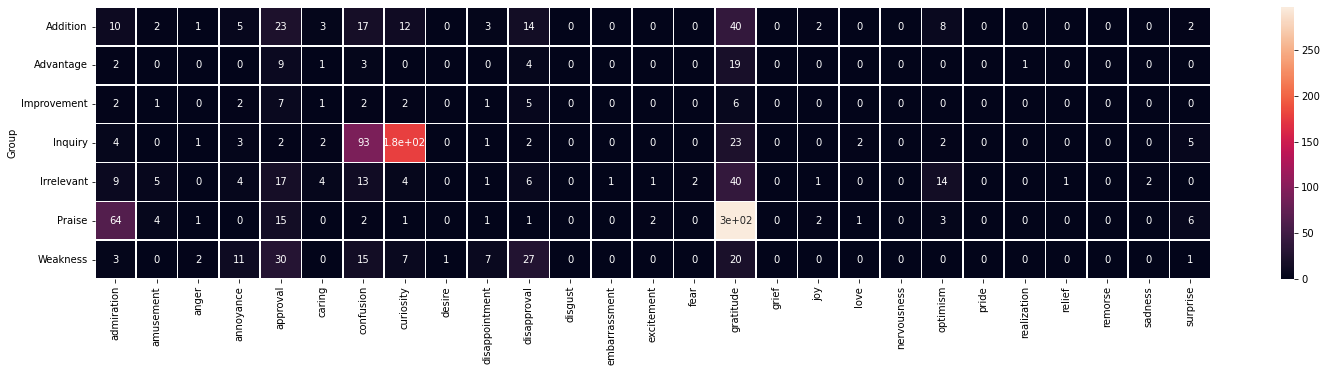

In [9]:
plt.figure(figsize = (25,5))
sns.heatmap(df, annot=True, linewidths=.5)